# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [16]:
import os
import keras
import itertools

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [9]:
train, test = keras.datasets.cifar10.load_data()

In [10]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [11]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [13]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
OPTIMIZER = [keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adagrad, keras.optimizers.Adam]

In [18]:
results = {}
for lr, opti in itertools.product(LEARNING_RATE, OPTIMIZER):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Optimizer = %s" % (lr, str(opti)))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    optimizer = opti(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s-optimizer-%s" % (str(lr), str(opti))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.SGD'>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000

Epoch 49/50
50000/50000 [==============================] - 6s 121us/step - loss: 0.7567 - accuracy: 0.7310 - val_loss: 1.8013 - val_accuracy: 0.4738
Epoch 50/50
50000/50000 [==============================] - 6s 123us/step - loss: 0.7373 - accuracy: 0.7375 - val_loss: 1.6689 - val_accuracy: 0.4940
Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.RMSprop'>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_____________

50000/50000 [==============================] - 5s 96us/step - loss: 2.3078 - accuracy: 0.0998 - val_loss: 2.3133 - val_accuracy: 0.1000
Epoch 47/50
50000/50000 [==============================] - 5s 96us/step - loss: 2.3083 - accuracy: 0.0986 - val_loss: 2.3086 - val_accuracy: 0.1000
Epoch 48/50
50000/50000 [==============================] - 5s 95us/step - loss: 2.3079 - accuracy: 0.0978 - val_loss: 2.3076 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 5s 96us/step - loss: 2.3081 - accuracy: 0.0994 - val_loss: 2.3213 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 5s 96us/step - loss: 2.3078 - accuracy: 0.1018 - val_loss: 2.3084 - val_accuracy: 0.1000
Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.Adagrad'>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)    

Epoch 44/50
50000/50000 [==============================] - 4s 90us/step - loss: 2.3027 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 45/50
50000/50000 [==============================] - 5s 90us/step - loss: 2.3027 - accuracy: 0.0963 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 46/50
50000/50000 [==============================] - 5s 90us/step - loss: 2.3027 - accuracy: 0.0946 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 47/50
50000/50000 [==============================] - 5s 93us/step - loss: 2.3027 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 48/50
50000/50000 [==============================] - 5s 90us/step - loss: 2.3027 - accuracy: 0.0977 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 4s 90us/step - loss: 2.3027 - accuracy: 0.0965 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 4s 90us/step - loss: 2.3027 - accuracy: 0.0967 - val_

50000/50000 [==============================] - 7s 140us/step - loss: 2.3065 - accuracy: 0.1021 - val_loss: 2.3070 - val_accuracy: 0.1000
Epoch 42/50
50000/50000 [==============================] - 6s 125us/step - loss: 2.3065 - accuracy: 0.1010 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 43/50
50000/50000 [==============================] - 7s 139us/step - loss: 2.3071 - accuracy: 0.0969 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 44/50
50000/50000 [==============================] - 6s 127us/step - loss: 2.3070 - accuracy: 0.0995 - val_loss: 2.3082 - val_accuracy: 0.1000
Epoch 45/50
50000/50000 [==============================] - 6s 124us/step - loss: 2.3069 - accuracy: 0.1004 - val_loss: 2.3085 - val_accuracy: 0.1000
Epoch 46/50
50000/50000 [==============================] - 6s 127us/step - loss: 2.3066 - accuracy: 0.1001 - val_loss: 2.3061 - val_accuracy: 0.1000
Epoch 47/50
50000/50000 [==============================] - 6s 125us/step - loss: 2.3067 - accuracy: 0.1009 - val_loss:

Epoch 39/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.2977 - accuracy: 0.5444 - val_loss: 1.4504 - val_accuracy: 0.4803
Epoch 40/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.2914 - accuracy: 0.5464 - val_loss: 1.5159 - val_accuracy: 0.4524
Epoch 41/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.2871 - accuracy: 0.5484 - val_loss: 1.4019 - val_accuracy: 0.4976
Epoch 42/50
50000/50000 [==============================] - 5s 90us/step - loss: 1.2766 - accuracy: 0.5484 - val_loss: 1.4788 - val_accuracy: 0.4743
Epoch 43/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.2707 - accuracy: 0.5552 - val_loss: 1.4188 - val_accuracy: 0.4931
Epoch 44/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.2637 - accuracy: 0.5548 - val_loss: 1.4176 - val_accuracy: 0.4964
Epoch 45/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.2631 - accuracy: 0.5572 - val_

50000/50000 [==============================] - 5s 99us/step - loss: 1.8394 - accuracy: 0.3140 - val_loss: 1.8539 - val_accuracy: 0.3059
Epoch 37/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.8395 - accuracy: 0.3160 - val_loss: 1.8656 - val_accuracy: 0.3093
Epoch 38/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.8333 - accuracy: 0.3143 - val_loss: 1.9628 - val_accuracy: 0.2825
Epoch 39/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.8317 - accuracy: 0.3146 - val_loss: 1.8876 - val_accuracy: 0.2971
Epoch 40/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.8355 - accuracy: 0.3127 - val_loss: 1.8585 - val_accuracy: 0.3029
Epoch 41/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.8430 - accuracy: 0.3132 - val_loss: 1.8283 - val_accuracy: 0.3185
Epoch 42/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.8341 - accuracy: 0.3171 - val_loss: 1.844

Epoch 34/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.1987 - accuracy: 0.5773 - val_loss: 1.3920 - val_accuracy: 0.5114
Epoch 35/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.1859 - accuracy: 0.5819 - val_loss: 1.3950 - val_accuracy: 0.5060
Epoch 36/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.1808 - accuracy: 0.5843 - val_loss: 1.3476 - val_accuracy: 0.5261
Epoch 37/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.1689 - accuracy: 0.5895 - val_loss: 1.3662 - val_accuracy: 0.5194
Epoch 38/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.1622 - accuracy: 0.5903 - val_loss: 1.4410 - val_accuracy: 0.4970
Epoch 39/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.1571 - accuracy: 0.5924 - val_loss: 1.3570 - val_accuracy: 0.5227
Epoch 40/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.1463 - accuracy: 0.5965 -

50000/50000 [==============================] - 6s 115us/step - loss: 1.5919 - accuracy: 0.4241 - val_loss: 1.6921 - val_accuracy: 0.3908
Epoch 32/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.5839 - accuracy: 0.4301 - val_loss: 1.7555 - val_accuracy: 0.3827
Epoch 33/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.5897 - accuracy: 0.4248 - val_loss: 1.6713 - val_accuracy: 0.4100
Epoch 34/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.5830 - accuracy: 0.4292 - val_loss: 1.6530 - val_accuracy: 0.4111
Epoch 35/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.5857 - accuracy: 0.4292 - val_loss: 1.6400 - val_accuracy: 0.4023
Epoch 36/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.5814 - accuracy: 0.4300 - val_loss: 1.6198 - val_accuracy: 0.4207
Epoch 37/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.5863 - accuracy: 0.4277 - val_loss:

50000/50000 [==============================] - 4s 78us/step - loss: 1.7775 - accuracy: 0.3785 - val_loss: 1.7786 - val_accuracy: 0.3804
Epoch 29/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.7723 - accuracy: 0.3792 - val_loss: 1.7743 - val_accuracy: 0.3844
Epoch 30/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.7673 - accuracy: 0.3816 - val_loss: 1.7683 - val_accuracy: 0.3829
Epoch 31/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.7624 - accuracy: 0.3840 - val_loss: 1.7644 - val_accuracy: 0.3829
Epoch 32/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.7576 - accuracy: 0.3843 - val_loss: 1.7596 - val_accuracy: 0.3869
Epoch 33/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.7528 - accuracy: 0.3863 - val_loss: 1.7572 - val_accuracy: 0.3844
Epoch 34/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.7482 - accuracy: 0.3882 - val_loss: 1.7511

50000/50000 [==============================] - 7s 134us/step - loss: 1.1348 - accuracy: 0.5943 - val_loss: 1.6457 - val_accuracy: 0.4592
Epoch 26/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.1153 - accuracy: 0.6007 - val_loss: 1.5494 - val_accuracy: 0.4803
Epoch 27/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.0944 - accuracy: 0.6078 - val_loss: 1.5652 - val_accuracy: 0.4977
Epoch 28/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.0783 - accuracy: 0.6136 - val_loss: 1.5968 - val_accuracy: 0.4749
Epoch 29/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.0600 - accuracy: 0.6232 - val_loss: 1.5341 - val_accuracy: 0.4943
Epoch 30/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.0441 - accuracy: 0.6271 - val_loss: 1.6553 - val_accuracy: 0.4680
Epoch 31/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.0254 - accuracy: 0.6325 - val_loss:

50000/50000 [==============================] - 5s 106us/step - loss: 1.4076 - accuracy: 0.5109 - val_loss: 1.4710 - val_accuracy: 0.4790
Epoch 23/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.4000 - accuracy: 0.5130 - val_loss: 1.4596 - val_accuracy: 0.4839
Epoch 24/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.3921 - accuracy: 0.5164 - val_loss: 1.4641 - val_accuracy: 0.4827
Epoch 25/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.3835 - accuracy: 0.5215 - val_loss: 1.4493 - val_accuracy: 0.4847
Epoch 26/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.3774 - accuracy: 0.5223 - val_loss: 1.4499 - val_accuracy: 0.4856
Epoch 27/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.3704 - accuracy: 0.5238 - val_loss: 1.4993 - val_accuracy: 0.4637
Epoch 28/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.3637 - accuracy: 0.5268 - val_loss: 1.

50000/50000 [==============================] - 6s 111us/step - loss: 1.1478 - accuracy: 0.5903 - val_loss: 1.3570 - val_accuracy: 0.5252
Epoch 20/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.1318 - accuracy: 0.5959 - val_loss: 1.4184 - val_accuracy: 0.5124
Epoch 21/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.1090 - accuracy: 0.6025 - val_loss: 1.4035 - val_accuracy: 0.5141
Epoch 22/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.0900 - accuracy: 0.6109 - val_loss: 1.3584 - val_accuracy: 0.5189
Epoch 23/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.0645 - accuracy: 0.6185 - val_loss: 1.4073 - val_accuracy: 0.5155
Epoch 24/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.0532 - accuracy: 0.6222 - val_loss: 1.3804 - val_accuracy: 0.5183
Epoch 25/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.0445 - accuracy: 0.6260 - val_loss:

50000/50000 [==============================] - 5s 106us/step - loss: 2.1877 - accuracy: 0.2285 - val_loss: 2.1845 - val_accuracy: 0.2304
Epoch 17/50
50000/50000 [==============================] - 5s 109us/step - loss: 2.1819 - accuracy: 0.2319 - val_loss: 2.1787 - val_accuracy: 0.2324
Epoch 18/50
50000/50000 [==============================] - 6s 111us/step - loss: 2.1762 - accuracy: 0.2352 - val_loss: 2.1729 - val_accuracy: 0.2372
Epoch 19/50
50000/50000 [==============================] - 6s 111us/step - loss: 2.1706 - accuracy: 0.2386 - val_loss: 2.1673 - val_accuracy: 0.2398
Epoch 20/50
50000/50000 [==============================] - 6s 113us/step - loss: 2.1651 - accuracy: 0.2418 - val_loss: 2.1618 - val_accuracy: 0.2440
Epoch 21/50
50000/50000 [==============================] - 5s 98us/step - loss: 2.1597 - accuracy: 0.2438 - val_loss: 2.1563 - val_accuracy: 0.2468
Epoch 22/50
50000/50000 [==============================] - 5s 104us/step - loss: 2.1544 - accuracy: 0.2469 - val_loss: 

50000/50000 [==============================] - 6s 126us/step - loss: 1.4082 - accuracy: 0.5066 - val_loss: 1.5651 - val_accuracy: 0.4453
Epoch 14/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.3899 - accuracy: 0.5129 - val_loss: 1.5099 - val_accuracy: 0.4567
Epoch 15/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.3725 - accuracy: 0.5161 - val_loss: 1.5236 - val_accuracy: 0.4471
Epoch 16/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.3553 - accuracy: 0.5238 - val_loss: 1.6323 - val_accuracy: 0.4300
Epoch 17/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.3402 - accuracy: 0.5288 - val_loss: 1.4040 - val_accuracy: 0.5039
Epoch 18/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.3242 - accuracy: 0.5354 - val_loss: 1.5336 - val_accuracy: 0.4591
Epoch 19/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.3087 - accuracy: 0.5422 - val_loss:

50000/50000 [==============================] - 6s 128us/step - loss: 1.7675 - accuracy: 0.3888 - val_loss: 1.7689 - val_accuracy: 0.3866
Epoch 11/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.7601 - accuracy: 0.3909 - val_loss: 1.7605 - val_accuracy: 0.3882
Epoch 12/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.7531 - accuracy: 0.3936 - val_loss: 1.7541 - val_accuracy: 0.3914
Epoch 13/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.7466 - accuracy: 0.3951 - val_loss: 1.7478 - val_accuracy: 0.3941
Epoch 14/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.7408 - accuracy: 0.3972 - val_loss: 1.7429 - val_accuracy: 0.3966
Epoch 15/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.7355 - accuracy: 0.3992 - val_loss: 1.7374 - val_accuracy: 0.3965
Epoch 16/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.7303 - accuracy: 0.4007 - val_loss:

50000/50000 [==============================] - 8s 156us/step - loss: 1.4652 - accuracy: 0.4851 - val_loss: 1.4966 - val_accuracy: 0.4749
Epoch 8/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.4353 - accuracy: 0.4953 - val_loss: 1.5327 - val_accuracy: 0.4430
Epoch 9/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.4097 - accuracy: 0.5038 - val_loss: 1.4557 - val_accuracy: 0.4793
Epoch 10/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.3845 - accuracy: 0.5121 - val_loss: 1.4232 - val_accuracy: 0.4973
Epoch 11/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.3648 - accuracy: 0.5187 - val_loss: 1.4186 - val_accuracy: 0.4928
Epoch 12/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.3381 - accuracy: 0.5289 - val_loss: 1.3984 - val_accuracy: 0.5039
Epoch 13/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.3215 - accuracy: 0.5361 - val_loss: 1

50000/50000 [==============================] - 5s 107us/step - loss: 2.3549 - accuracy: 0.1085 - val_loss: 2.3514 - val_accuracy: 0.1089
Epoch 5/50
50000/50000 [==============================] - 5s 102us/step - loss: 2.3494 - accuracy: 0.1104 - val_loss: 2.3462 - val_accuracy: 0.1100
Epoch 6/50
50000/50000 [==============================] - 5s 101us/step - loss: 2.3444 - accuracy: 0.1129 - val_loss: 2.3414 - val_accuracy: 0.1120
Epoch 7/50
50000/50000 [==============================] - 5s 101us/step - loss: 2.3397 - accuracy: 0.1147 - val_loss: 2.3370 - val_accuracy: 0.1123
Epoch 8/50
50000/50000 [==============================] - 5s 102us/step - loss: 2.3354 - accuracy: 0.1165 - val_loss: 2.3328 - val_accuracy: 0.1133
Epoch 9/50
50000/50000 [==============================] - 5s 102us/step - loss: 2.3314 - accuracy: 0.1178 - val_loss: 2.3290 - val_accuracy: 0.1139
Epoch 10/50
50000/50000 [==============================] - 5s 103us/step - loss: 2.3277 - accuracy: 0.1191 - val_loss: 2.32

50000/50000 [==============================] - 7s 132us/step - loss: 2.1136 - accuracy: 0.2510 - val_loss: 1.9971 - val_accuracy: 0.3123
Epoch 2/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.9474 - accuracy: 0.3190 - val_loss: 1.9052 - val_accuracy: 0.3353
Epoch 3/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.8725 - accuracy: 0.3475 - val_loss: 1.8466 - val_accuracy: 0.3555
Epoch 4/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.8249 - accuracy: 0.3629 - val_loss: 1.8079 - val_accuracy: 0.3680
Epoch 5/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.7900 - accuracy: 0.3766 - val_loss: 1.7756 - val_accuracy: 0.3837
Epoch 6/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.7614 - accuracy: 0.3854 - val_loss: 1.7544 - val_accuracy: 0.3816
Epoch 7/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.7377 - accuracy: 0.3941 - val_loss: 1.732

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 134us/step - loss: 2.2544 - accuracy: 0.1677 - val_loss: 2.2278 - val_accuracy: 0.1863
Epoch 2/50
50000/50000 [==============================] - 7s 132us/step - loss: 2.2105 - accuracy: 0.2047 - val_loss: 2.1987 - val_accuracy: 0.2178
Epoch 3/50
50000/50000 [==============================] - 6s 129us/step - loss: 2.1862 - accuracy: 0.2267 - val_loss: 2.1787 - val_accuracy: 0.2312
Epoch 4/50
50000/50000 [==============================] - 6s 130us/step - loss: 2.1682 - accuracy: 0.2408 - val_loss: 2.1628 - val_accuracy: 0.2427
Epoch 5/50
50000/50000 [==============================] - 6s 130us/step - loss: 2.1535 - accuracy: 0.2495 - val_loss: 2.1495 - val_accuracy: 0.2505
Epoch 6/50
50000/50000 [==============================] - 7s 141us/step - loss: 2.1411 - accuracy: 0.2566 - val_loss: 2.1383 - val_accuracy: 0.2568
Epoch 7/50
50000/50000 [==============================] - 7s 1

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 159us/step - loss: 2.1493 - accuracy: 0.2352 - val_loss: 2.0205 - val_accuracy: 0.2925
Epoch 2/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.9509 - accuracy: 0.3207 - val_loss: 1.9020 - val_accuracy: 0.3413
Epoch 3/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.8667 - accuracy: 0.3500 - val_loss: 1.8420 - val_accuracy: 0.3657
Epoch 4/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.8154 - accuracy: 0.3685 - val_loss: 1.7993 - val_accuracy: 0.3775
Epoch 5/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.7780 - accuracy: 0.3806 - val_loss: 1.7669 - val_accuracy: 0.3900
Epoch 6/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.7471 - accuracy: 0.3909 - val_loss: 1.7376 - val_accuracy: 0.3998
Epoch 7/50
50000/50000 [==============================] - 8s 1

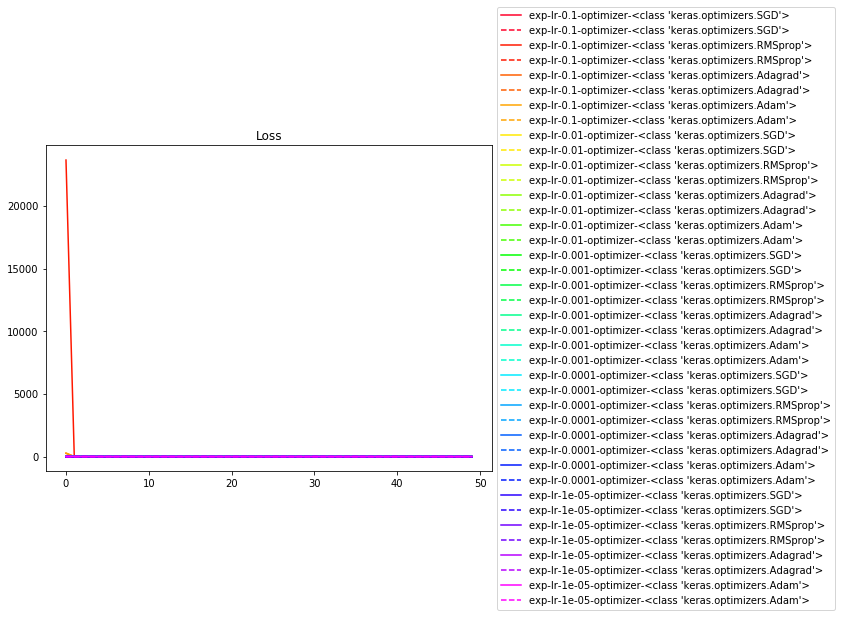

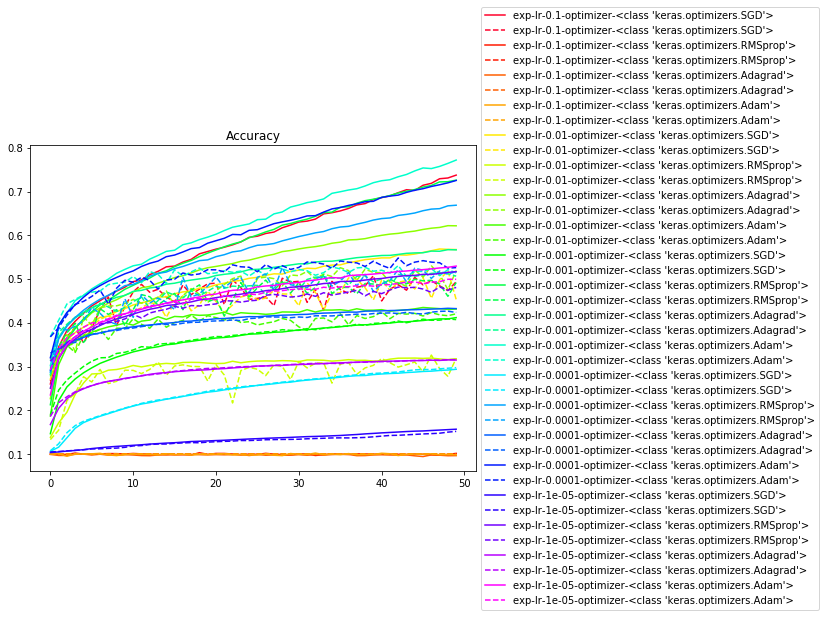

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline 
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()